<a href="https://colab.research.google.com/github/ericabernardeslanga/Teste/blob/main/C%C3%B3pia_de_Desafio_Individual_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importando bibliotecas e pacotes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

In [ ]:
# lendo base de dados para análise
df = pd.read_csv('/content/7M_car_price.csv')

In [ ]:
# lendo base de dados para análise
df2 = pd.read_csv('/content/Adm20M_kc_house_data.csv')

In [ ]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [ ]:
df2.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


1. Codifique e exiba a matriz de correlação entre as variáveis numéricas.
Além disso, qual é a correlação entre o preço price e o número de
quartos bedrooms? Existe alguma diferença na correlação quando
consideramos apenas casas com uma área total sqft_living superior a
2000 pés quadrados?

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9999 non-null   int64  
 1   date           9999 non-null   object 
 2   price          9999 non-null   float64
 3   bedrooms       9999 non-null   int64  
 4   bathrooms      9999 non-null   float64
 5   sqft_living    9999 non-null   int64  
 6   sqft_lot       9999 non-null   int64  
 7   floors         9999 non-null   float64
 8   waterfront     9999 non-null   object 
 9   view           9999 non-null   int64  
 10  condition      9999 non-null   int64  
 11  grade          9999 non-null   int64  
 12  sqft_above     9999 non-null   int64  
 13  sqft_basement  9999 non-null   int64  
 14  yr_built       9999 non-null   int64  
 15  yr_renovated   9999 non-null   int64  
 16  zipcode        9999 non-null   int64  
 17  lat            9999 non-null   float64
 18  long    

In [ ]:
# selecionando apenas variáveis numéricas
variaveis_numericas = df2.select_dtypes(include=['int64', 'float64'])
variaveis_numericas.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# gerando matriz de correlação entre price e
matriz_correlacao = variaveis_numericas.corr()

print(matriz_correlacao)

                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000  0.005779  0.013855   0.007435     0.000415 -0.132510   
price          0.005779  1.000000  0.299207   0.521193     0.702199  0.090720   
bedrooms       0.013855  0.299207  1.000000   0.539449     0.573915  0.028929   
bathrooms      0.007435  0.521193  0.539449   1.000000     0.764810  0.091268   
sqft_living    0.000415  0.702199  0.573915   0.764810     1.000000  0.167809   
sqft_lot      -0.132510  0.090720  0.028929   0.091268     0.167809  1.000000   
floors         0.012260  0.276954  0.213565   0.494247     0.392802  0.021320   
view           0.035295  0.398731  0.090767   0.205681     0.293149  0.064464   
condition     -0.021744  0.044596  0.023435  -0.089029    -0.047375 -0.019324   
grade          0.012872  0.651100  0.360955   0.660915     0.763526  0.121719   
sqft_above    -0.007168  0.607763  0.464872   0.686311     0.869266  0.184876   
sqft_basement  0.013732  0.3

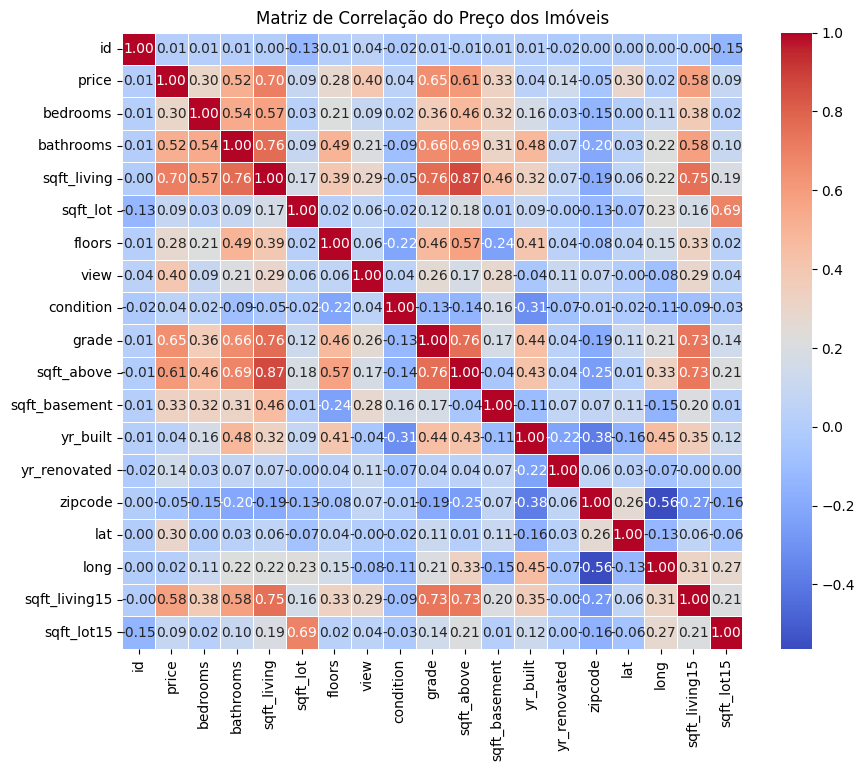

In [ ]:
#  matriz de correlação - grafico
plt.figure(figsize=(10,8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação do Preço dos Imóveis')
plt.show()

In [ ]:
df_dummies = pd.get_dummies(df2).astype(int)
df_dummies.head(1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,...,date_20150508T000000,date_20150509T000000,date_20150510T000000,date_20150511T000000,date_20150512T000000,date_20150513T000000,date_20150514T000000,date_20150515T000000,waterfront_n,waterfront_y
0,7129300520,221900,3,1,1180,5650,1,0,3,7,...,0,0,0,0,0,0,0,0,1,0


Qual é a correlação entre o preço price e o número de
quartos bedrooms?

In [ ]:
matriz_correlacao = df2['bedrooms'].corr(df2['price'])

print(matriz_correlacao)


0.299207216169182


Com um coeficiente de correlação de aproximadamente 0.299, podemos entender que há uma correlação positiva fraca entre o número de quartos ('bedrooms') e o preço ('price') . Significa que à medida que o número de quartos aumenta, o preço também tende a aumentar, mas a relação não é muito forte.

In [ ]:
X1 = sm.add_constant(df_dummies['bedrooms'])
y = df_dummies['price']
model1 = sm.OLS(y, X1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     983.0
Date:                Mon, 13 May 2024   Prob (F-statistic):          6.71e-206
Time:                        01:09:01   Log-Likelihood:            -1.4211e+05
No. Observations:                9999   AIC:                         2.842e+05
Df Residuals:                    9997   BIC:                         2.842e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.194e+05   1.37e+04      8.727      0.0

R² é 0.090, o que significa que aproximadamente 9% da variação no preço pode ser explicada pelo número de quartos. Isso indica uma relação fraca entre essas duas variáveis.
Coeficientes (coef) para a variável 'bedrooms' é de aproximadamente 123200. Isso significa que, em média, o preço aumenta em cerca de 123200 unidades da moeda para cada quarto que aumenta  no imóvel.
P>|t| (p-value)  p_valor para 'bedrooms' é muito baixo (0.000), indicando que o número de quartos tem uma relação estatisticamente significativa com o preço.
Embora a relação entre o número de quartos e o preço seja estatisticamente significativa, o modelo explica apenas uma pequena parte da variação nos preços das propriedades.

Existe alguma diferença na correlação quando consideramos apenas casas com uma área total sqft_living superior a 2000 pés quadrados?

In [ ]:
df_sub = df2[df2['sqft_living'] > 2000]

In [ ]:
#correlação entre 'bedrooms' e 'price'
correlation_sub = df_sub['bedrooms'].corr(df_sub['price'])
print(correlation_sub)

0.11912115548964147


 A correlação entre o número de quartos e o preço é um pouco mais fraca para casas com uma área superior a 2000 pés quadrados em comparação com o conjunto geral de dados. Isso sugere que, para casas maiores, outros fatores além do número de quartos podem ter mais influência sobre o preço.

2. Existe alguma correlação entre o preço price e a área total da casa
sqft_living, considerando apenas casas com pelo menos dois
banheiros bathrooms?